# Demonstrating the dp4gp module

In [1]:
import numpy as np
import GPy
import dp4gp
import matplotlib.pyplot as plt
%matplotlib inline

warning in stationary: failed to import cython module: falling back to numpy


### Test code

This empirically checks if the system is achieving $(\varepsilon, \delta)$-DP. Although this isn't a proof, it is probably a wise sanity check. Note that $\varepsilon \leq 1$ in the proof.

In [ ]:
t = dp4gp.Test_DPGP_cloaking()
t.test()

### Data

This is the data we are going to fit.

In [2]:
trainX = np.arange(0,10,0.05)[:,None]
trainy = np.sin(trainX)+np.random.randn(len(trainX),1)*0.5
sens = 2
#ystd = np.std(trainy)
#trainy = trainy/ystd
ystd = 1.0

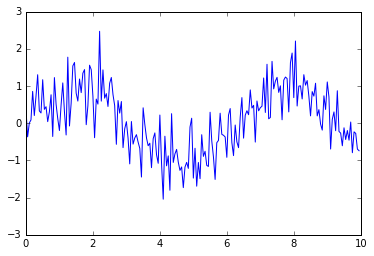

In [3]:
plt.plot(trainX,trainy);


### Demo of standard GP method

This is the standard GP method, here I've used a value of $\varepsilon$ of 100, and even then the noise is too large to be useful.

 dp4gp.py:65: RuntimeWarning:covariance is not positive-semidefinite.


(-2, 2)

 /home/lionfish/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


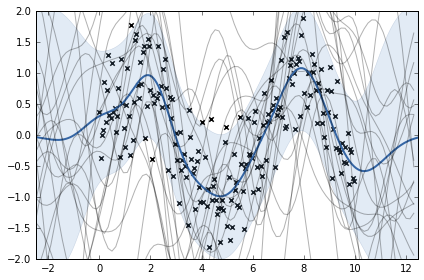

In [4]:
mod = GPy.models.GPRegression(trainX,trainy)
mod.Gaussian_noise = 0.5**2/ystd
mod.rbf.lengthscale = 1.0
dpgp = dp4gp.DPGP_normal_prior(mod,10.0/ystd,100.0,0.01)
#Xtest = np.arange(0,10,0.1)[:,None]
#mu = dpgp.draw_prediction_samples(Xtest,20)

dpgp.plot()
plt.ylim([-2,2])

### Demo of Pseudo-inputs method

Providing a marginal improvement on the normal GP differential privacy method. Note that $\varepsilon = 100$ still.

(-2, 2)

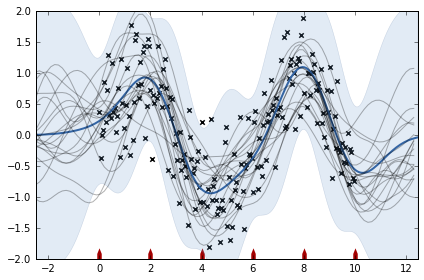

In [8]:
mod = GPy.models.SparseGPRegression(trainX,trainy,num_inducing=3)
mod.inference_method = GPy.inference.latent_function_inference.FITC()
mod.set_Z(np.array([[0,2,4,6,8,10]]).T)
mod.Gaussian_noise = 0.5**2/ystd
mod.rbf.lengthscale = 1.0
dpgp = dp4gp.DPGP_pseudo_prior(mod,10.0/ystd,100.0,0.01)
#Xtest = np.arange(0,10,0.1)[:,None]
#mu = dpgp.draw_prediction_samples(Xtest,20)
dpgp.plot()
plt.ylim([-2,2])

### Demo of cloaking method

This method on the other hand only adds noise in those directions that need it most. It can't have a value of $\varepsilon>1$ and here it is equal to one.

Stopped before convergence


 dp4gp.py:260: RuntimeWarning:divide by zero encountered in log
 dp4gp.py:327: RuntimeWarning:covariance is not positive-semidefinite.


(-2, 2)

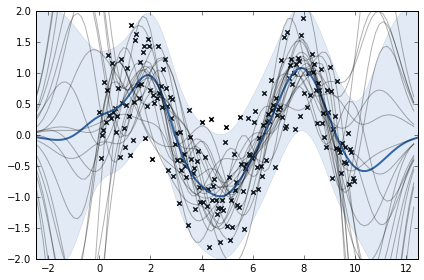

In [10]:
mod = GPy.models.GPRegression(trainX,trainy)
mod.Gaussian_noise = 0.5**2/ystd
mod.rbf.lengthscale = 1.0
dpgp = dp4gp.DPGP_cloaking(mod,sens/ystd,1.0,0.01)
#Xtest = np.arange(0,10,0.1)[:,None]
#mu = dpgp.draw_prediction_samples(Xtest,20)
dpgp.plot()
plt.ylim([-2,2])